In [1]:
import math
import numpy as np
import pandas as pd
import pandapower as pp
import geopandas as gpd
import matplotlib.pyplot as plt
from pandapower import plotting
from shapely.geometry import Point, LineString

In [2]:
#Location Points

# Mallorca
LOC_MA_1= (2.5088564,39.5377075)  
LOC_MA_2=(2.549367,39.584154)
LOC_MA_3=(2.678766,39.650978)
LOC_MA_4=(2.744258,39.600043)
LOC_MA_5=(2.7024111,39.5478121)
LOC_MA_6=(2.7256946,39.5682897)
LOC_MA_7=(3.039469,39.673588)
LOC_MA_8=(3.092512, 39.809610)
LOC_MA_9=(3.1586049,39.5817999)
LOC_MA_10=(3.4272896,39.7388162)

# Menorca
LOC_ME_1=(3.8337878,39.9319657)
LOC_ME_2=(3.8555081,40.0032335)
LOC_ME_3=(4.095810,39.977051)
LOC_ME_4=(4.237077,39.890989)
LOC_ME_5=(4.2579450,39.8971622)

# Ibiza
LOC_IB_1=(1.431238,38.919151)


#Length of lines
Length_MA_1_2=6.2
Length_MA_2_3_1=15.4 #up line
Length_MA_2_3_2=14.8 #down
Length_MA_3_4=9.0
Length_MA_4_5=7.4
Length_MA_4_6=4.0
Length_MA_3_7=33.7
Length_MA_4_7=28.8
Length_MA_7_8_1=16.6 #left
Length_MA_7_8_2=16.0 #right
Length_MA_7_9_1=15.0
Length_MA_7_9_2=15.4
Length_MA_9_10=30.3

Length_MA_10_ME_1=41.8

Length_ME_1_2=8.3
Length_ME_2_3=21.1
Length_ME_2_4=35.5
Length_ME_3_4=15.5
Length_ME_4_5_1=2.6 #up
Length_ME_4_5_2=2.0 #down

Length_MA_1_IB_1=126.0


#Set voltage variables
PF= 0.4843


In [3]:
#1:20PM 27/06/2020
net = pp.create_empty_network()

# Buses for Mallorca
Bus_MA_1_L = pp.create_bus(net, vn_kv=132, name = "MA_1_L", geodata=LOC_MA_1)
Bus_MA_1_H = pp.create_bus(net, vn_kv=220, name = "MA_1_H", geodata=LOC_MA_1)
Bus_MA_2=pp.create_bus(net, vn_kv=220, name = "MA_2", geodata=LOC_MA_2)
Bus_MA_3=pp.create_bus(net, vn_kv=220, name = "MA_3", geodata=LOC_MA_3)
Bus_MA_4=pp.create_bus(net, vn_kv=220, name = "MA_4", geodata=LOC_MA_4)
Bus_MA_5=pp.create_bus(net, vn_kv=220, name = "MA_5", geodata=LOC_MA_5)
Bus_MA_6=pp.create_bus(net, vn_kv=220, name = "MA_6", geodata=LOC_MA_6)
Bus_MA_7=pp.create_bus(net, vn_kv=220, name = "MA_7", geodata=LOC_MA_7)
Bus_MA_8=pp.create_bus(net, vn_kv=220, name = "MA_8", geodata=LOC_MA_8)
Bus_MA_9_L=pp.create_bus(net, vn_kv=132, name = "MA_9_L", geodata=LOC_MA_9) 
Bus_MA_9_H=pp.create_bus(net, vn_kv=220, name = "MA_9_H", geodata=LOC_MA_9) 
Bus_MA_10=pp.create_bus(net, vn_kv=132, name = "MA_10", geodata=LOC_MA_10)

# Buses for Menorca
Bus_ME_1=pp.create_bus(net, vn_kv=132, name = "ME_1", geodata=LOC_ME_1)
Bus_ME_2=pp.create_bus(net, vn_kv=132, name = "ME_2", geodata=LOC_ME_2)
Bus_ME_3=pp.create_bus(net, vn_kv=132, name = "ME_3", geodata=LOC_ME_3)
Bus_ME_4=pp.create_bus(net, vn_kv=132, name = "ME_4", geodata=LOC_ME_4)
Bus_ME_5=pp.create_bus(net, vn_kv=132, name = "ME_5", geodata=LOC_ME_5)

# Buses for Ibiza
Bus_IB_1=pp.create_bus(net, vn_kv=132, name = "IB_1", geodata=LOC_IB_1)

# Swing Bus
Swing_1 = pp.create_ext_grid(net, bus=Bus_MA_1_H, vm_pu=1.00, name="Swing Bus 1")


# Load

# Mallorca
Load_MA_1 = pp.create_load(net, bus=Bus_MA_1_L, p_mw=35, q_mvar=35*PF, name = "MA_1 Load")
Load_MA_1_R = pp.create_load(net, bus=Bus_MA_1_L, p_mw=0, q_mvar=200, name = "MA_1 Reactor")
Load_MA_2 = pp.create_load(net, bus=Bus_MA_2, p_mw=28, q_mvar=28*PF, name = "MA_2 Load")
Load_MA_3 = pp.create_load(net, bus=Bus_MA_3, p_mw=76, q_mvar=76*PF, name = "MA_3 Load")
Load_MA_4 = pp.create_load(net, bus=Bus_MA_4, p_mw=89, q_mvar=89*PF, name = "MA_4 Load")
Load_MA_5 = pp.create_load(net, bus=Bus_MA_5, p_mw=53, q_mvar=53*PF, name = "MA_5 Load")
Load_MA_6 = pp.create_load(net, bus=Bus_MA_6, p_mw=35, q_mvar=35*PF, name = "MA_6 Load")
Load_MA_7 = pp.create_load(net, bus=Bus_MA_7, p_mw=56, q_mvar=56*PF, name = "MA_7 Load")
Load_MA_8 = pp.create_load(net, bus=Bus_MA_8, p_mw=42, q_mvar=42*PF, name = "MA_8 Load")
Load_MA_9 = pp.create_load(net, bus=Bus_MA_9_L, p_mw=70, q_mvar=70*PF, name = "MA_9 Load")
Load_MA_10 = pp.create_load(net, bus=Bus_MA_10, p_mw=22, q_mvar=22*PF, name = "MA_10 Load")

# Menorca
Load_ME_1 = pp.create_load(net, bus=Bus_ME_1, p_mw=9, q_mvar=9*PF, name = "ME_1 Load")
Load_ME_2 = pp.create_load(net, bus=Bus_ME_2, p_mw=12, q_mvar=12*PF, name = "ME_2 Load")
Load_ME_3 = pp.create_load(net, bus=Bus_ME_3, p_mw=3, q_mvar=3*PF, name = "ME_3 Load")
Load_ME_4 = pp.create_load(net, bus=Bus_ME_4, p_mw=24, q_mvar=24*PF, name = "ME_4 Load")
Load_ME_5 = pp.create_load(net, bus=Bus_ME_5, p_mw=5, q_mvar=5*PF, name = "ME_5 Load")

# Ibiza
Load_IB_1 = pp.create_load(net, bus=Bus_IB_1, p_mw=104, q_mvar=104*PF, name = "IB_1 Load")

# Generator
Gen_MA_3 = pp.create_sgen(net, bus = Bus_MA_3, p_mw = 174.1, q_mvar = 174.1*PF, name = 'MA_3 Generation')
Gen_MA_8 = pp.create_sgen(net, bus = Bus_MA_8, p_mw = 174.1, q_mvar = 174.1*PF, name = 'MA_8 Generation')
Gen_MA_7 = pp.create_sgen(net, bus = Bus_MA_7, p_mw = 39, q_mvar = 39*PF, name = 'MA_7 Generation')

Gen_ME_5 = pp.create_sgen(net, bus = Bus_ME_5, p_mw = 55.8, q_mvar = 55.8*PF, name = 'ME_5 Generation')
Gen_IB_1 = pp.create_sgen(net, bus = Bus_IB_1, p_mw = 25, q_mvar = 25*PF, name = 'IB_1 Generation')


In [4]:
Trans_MA_1 = pp.create_transformer_from_parameters(net, hv_bus=Bus_MA_1_H, lv_bus=Bus_MA_1_L, sn_mva=400, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=1, vk_percent=10, pfe_kw=4, i0_percent=1)

Trans_MA_9 = pp.create_transformer_from_parameters(net, hv_bus=Bus_MA_9_H, lv_bus=Bus_MA_9_L, sn_mva=400, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=1, vk_percent=10, pfe_kw=4, i0_percent=1)


In [5]:
#132kv underwater line properties
R_LU = 0.06
X_LU = 0.144
C_LU = 144.0
A_LU = 0.588

#132 overhead line properties
R_LO = 0.1188
X_LO = 0.39
C_LO = 9.0
A_LO = 0.645

#220 overhead line properties
R_HO = 0.059
X_HO = 0.285
C_HO = 10
A_HO = 0.96

# Mallcora to Ibiza (Bus 1 - Bus 16)
Line1_MA_1_IB_1 = pp.create_line_from_parameters(net, from_bus = Bus_MA_1_L , to_bus = Bus_IB_1 , length_km=Length_MA_1_IB_1  , r_ohm_per_km=R_LU, x_ohm_per_km=X_LU, c_nf_per_km = C_LU, max_i_ka =A_LU, name = 'Line1_MA_1_IB_1', geodata = [LOC_IB_1, LOC_MA_1])
Line2_MA_1_IB_1 = pp.create_line_from_parameters(net, from_bus = Bus_MA_1_L, to_bus = Bus_IB_1, length_km=Length_MA_1_IB_1 ,  r_ohm_per_km=R_LU, x_ohm_per_km=X_LU, c_nf_per_km = C_LU, max_i_ka =A_LU , name = 'Line2_MA_1_IB_1', geodata = [LOC_IB_1, LOC_MA_1])

# Mallcora to Mencora (Bus 10 - Bus 11)
Line_MA_10_ME_1 = pp.create_line_from_parameters(net, from_bus = Bus_MA_10, to_bus = Bus_ME_1, length_km= Length_MA_10_ME_1,  r_ohm_per_km=R_LU, x_ohm_per_km=X_LU, c_nf_per_km = C_LU, max_i_ka = A_LU, name ='Line_MA_10_ME_1', geodata = [LOC_MA_10, LOC_ME_1]) 

# Inside Mencora
Line_ME_1_2=pp.create_line_from_parameters(net, from_bus = Bus_ME_1, to_bus = Bus_ME_2, length_km= Length_ME_1_2,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_1_2', geodata = [LOC_ME_1, LOC_ME_2]) 
Line_ME_2_3=pp.create_line_from_parameters(net, from_bus = Bus_ME_2, to_bus = Bus_ME_3, length_km= Length_ME_2_3,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_2_3', geodata = [LOC_ME_2, LOC_ME_3]) 
Line_ME_2_4=pp.create_line_from_parameters(net, from_bus = Bus_ME_2, to_bus = Bus_ME_4, length_km= Length_ME_2_4,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_2_4', geodata = [LOC_ME_2, LOC_ME_4]) 
Line_ME_3_4=pp.create_line_from_parameters(net, from_bus = Bus_ME_3, to_bus = Bus_ME_4, length_km= Length_ME_3_4,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_3_4', geodata = [LOC_ME_3, LOC_ME_4]) 
Line_ME_4_5_1=pp.create_line_from_parameters(net, from_bus = Bus_ME_4, to_bus = Bus_ME_5, length_km= Length_ME_4_5_1,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_4_5_1', geodata = [LOC_ME_4, LOC_ME_5]) 
Line_ME_4_5_2=pp.create_line_from_parameters(net, from_bus = Bus_ME_4, to_bus = Bus_ME_5, length_km= Length_ME_4_5_2,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_4_5_2', geodata = [LOC_ME_4, LOC_ME_5]) 


# Inside Mallcora

# Bus 1 H - Bus 2
Line_MA_1_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_1_H, to_bus = Bus_MA_2, length_km= Length_MA_1_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_1_2', geodata = [LOC_MA_1, LOC_MA_2]) 

# Bus 2 - Bus 3
Line_MA_2_3_1=pp.create_line_from_parameters(net, from_bus = Bus_MA_2, to_bus = Bus_MA_3, length_km= Length_MA_2_3_1,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_2_3_1', geodata = [LOC_MA_2, LOC_MA_3]) 
Line_MA_2_3_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_2, to_bus = Bus_MA_3, length_km= Length_MA_2_3_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_2_3_2', geodata = [LOC_MA_2, LOC_MA_3]) 

# Bus 3 - Bus 4
Line_MA_3_4=pp.create_line_from_parameters(net, from_bus = Bus_MA_3, to_bus = Bus_MA_4, length_km= Length_MA_3_4,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_3_4', geodata = [LOC_MA_3, LOC_MA_4]) 

# Bus 5 - Bus 4
Line_MA_5_4=pp.create_line_from_parameters(net, from_bus = Bus_MA_5, to_bus = Bus_MA_4, length_km= Length_MA_4_5,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_5_4', geodata = [LOC_MA_5, LOC_MA_4]) 

# Bus 6 - Bus 4
Line_MA_6_4=pp.create_line_from_parameters(net, from_bus = Bus_MA_6, to_bus = Bus_MA_4, length_km= Length_MA_4_6,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_6_4', geodata = [LOC_MA_6, LOC_MA_4]) 

# Bus 3 - Bus 7
Line_MA_3_7=pp.create_line_from_parameters(net, from_bus = Bus_MA_3, to_bus = Bus_MA_7, length_km= Length_MA_3_7,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_3_7', geodata = [LOC_MA_3, LOC_MA_7]) 

# Bus 4 - Bus 7
Line_MA_4_7=pp.create_line_from_parameters(net, from_bus = Bus_MA_4, to_bus = Bus_MA_7, length_km= Length_MA_4_7,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_4_7', geodata = [LOC_MA_4, LOC_MA_7]) 

# Bus 7 - Bus 8
Line_MA_7_8_1=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_8, length_km= Length_MA_7_8_1,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_8_1', geodata = [LOC_MA_7, LOC_MA_8]) 
Line_MA_7_8_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_8, length_km= Length_MA_7_8_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_8_2', geodata = [LOC_MA_7, LOC_MA_8]) 

# Bus 7 - Bus 9 H
Line_MA_7_9_1=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_9_H, length_km= Length_MA_7_9_1,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_9_1', geodata = [LOC_MA_7, LOC_MA_9]) 
Line_MA_7_9_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_9_H, length_km= Length_MA_7_9_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_9_2', geodata = [LOC_MA_7, LOC_MA_9]) 

# Bus 9 L - Bus 10
Line_MA_9_10=pp.create_line_from_parameters(net, from_bus = Bus_MA_9_L, to_bus = Bus_MA_10, length_km= Length_MA_9_10,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_MA_9_10', geodata = [LOC_MA_9, LOC_MA_10]) 


In [6]:
pp.runpp(net)

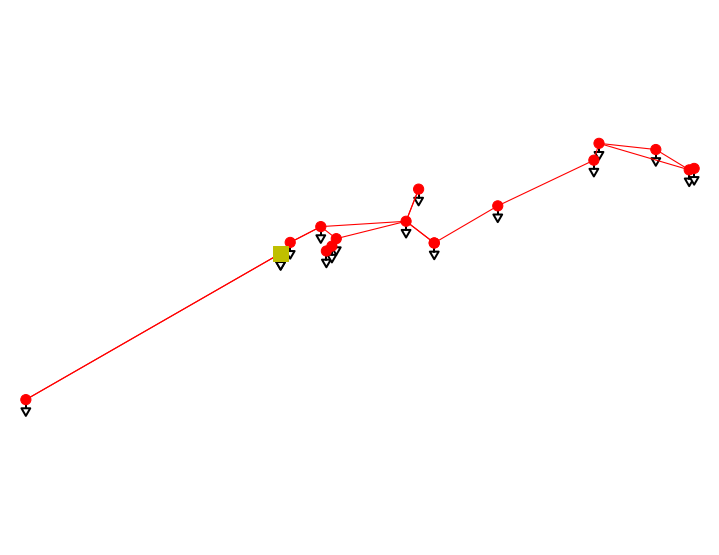

In [7]:
pp.to_excel(net, 'Q1_1320.xlsx')
pp.plotting.simple_plot(net, line_width=1.1, bus_size=1.1, ext_grid_size=1.1, trafo_size=1.2, plot_loads=True, plot_sgens=False, load_size=1.1, sgen_size=3.0, switch_size=1.1, switch_distance=1.1, plot_line_switches=False, scale_size=True, bus_color='r', line_color='red', trafo_color='k', ext_grid_color='y', switch_color='k', library='igraph', show_plot=True)


In [8]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,40.577586,-74.681509,-39.500000,-19.129850,1.077586,-93.811359,0.379730,0.193638,0.379730,0.978983,-1.589905,0.991348,-4.779959,64.579981
1,40.577586,-74.681509,-39.500000,-19.129850,1.077586,-93.811359,0.379730,0.193638,0.379730,0.978983,-1.589905,0.991348,-4.779959,64.579981
2,-2.597714,-39.381177,2.668924,5.359553,0.071211,-34.021624,0.170123,0.025607,0.170123,1.014693,-3.063478,1.022696,-3.192103,28.932439
3,-11.668924,-9.718253,11.681179,9.329818,0.012255,-0.388435,0.064947,0.063789,0.064947,1.022696,-3.192103,1.025070,-3.103019,10.069233
4,-11.017469,-7.176234,11.040107,6.153357,0.022638,-1.022877,0.056103,0.053688,0.056103,1.025070,-3.103019,1.029679,-2.872341,8.698178
5,-12.663710,-7.965184,12.712089,6.271025,0.048378,-1.694160,0.063834,0.059986,0.063834,1.025070,-3.103019,1.033554,-2.651070,9.896818
6,-14.040107,-7.606257,14.064925,6.875068,0.024818,-0.731189,0.067829,0.066251,0.067829,1.029679,-2.872341,1.033554,-2.651070,10.516146
7,-22.076962,-10.785046,22.086957,10.680895,0.009994,-0.104151,0.103979,0.103726,0.103979,1.033554,-2.651070,1.034537,-2.592405,16.120793
8,-28.700051,-13.984247,28.713043,13.921545,0.012992,-0.062702,0.135105,0.134911,0.135105,1.033554,-2.651070,1.034537,-2.592405,20.946584
9,82.432025,-17.572588,-82.378458,16.888605,0.053566,-0.683983,0.221189,0.220682,0.221189,1.000000,0.000000,1.000006,-0.179833,23.040499
